In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [24]:
def train(ph, Theta=0.000001):
    V = [0]*101
    V[100] = 1
    # for i in range(0, 100):
    #     V[i] = np.random.random() * 1000
    # V[0] = 0
    pi = [0]*100
    while True:
        Delta = 0
        for s in range(1, 100):
            # for all state
            old_v = V[s]
            v = [0] * 51
            for a in range(1, min(s, 100 - s) + 1):
                # every state i can call or the num to win at least
                # for these all reasonable actions
                v[a] = 0
                if a + s <= 100:
                    v[a] += ph * (0 + V[s + a]) + (1 - ph) * (0 + V[s - a]) 
                    # sigma for success and drop
                    # 0 is for r 
            op_a = np.argmax(v)
            # op! 原神，--！
            pi[s] = op_a
            V[s] = v[op_a]
            Delta = max(Delta, abs(old_v - V[s]))
        if Delta < Theta:
            break
    return [V[1:100], pi[1:100]]

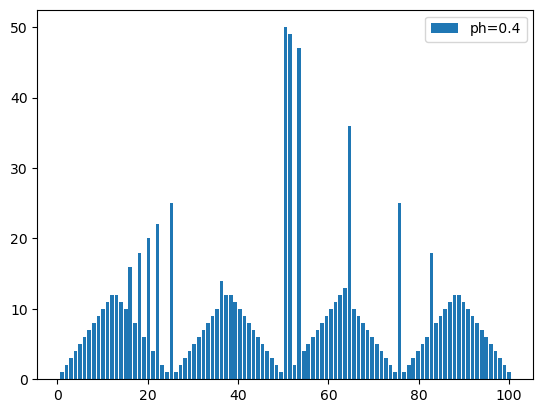

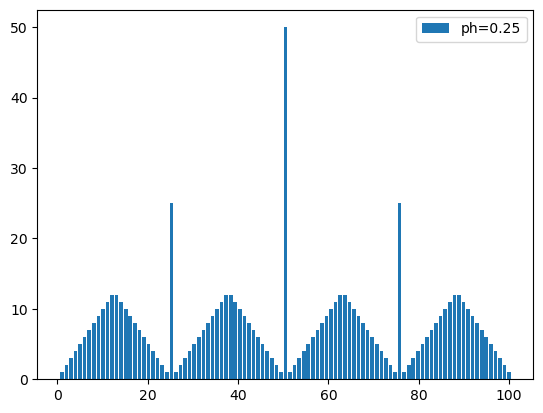

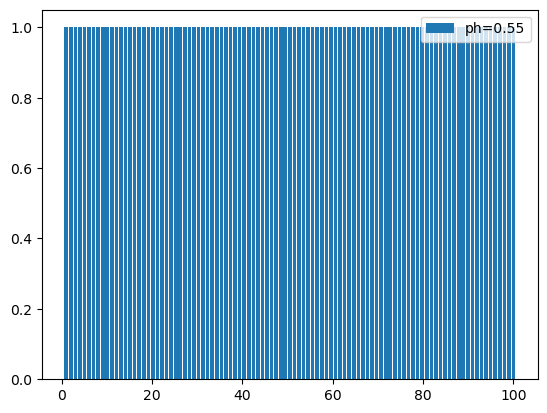

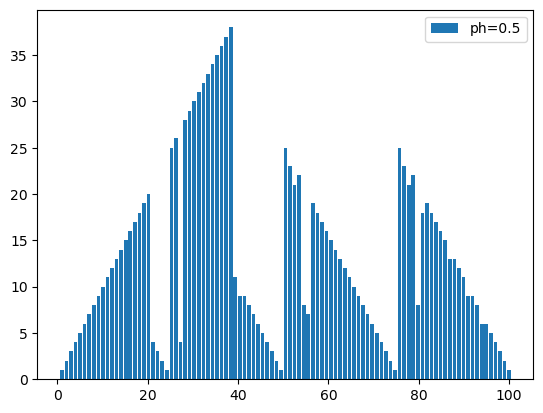

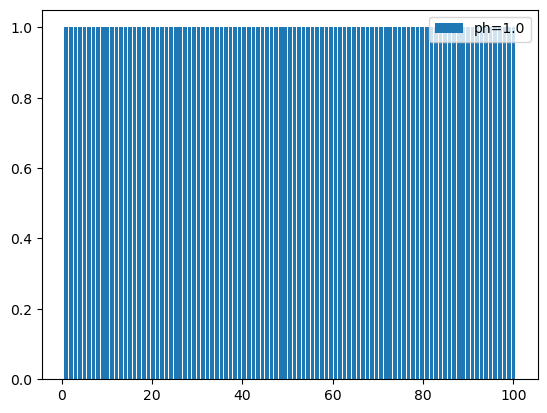

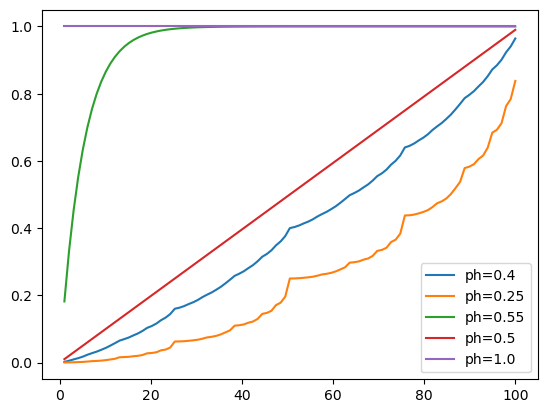

In [25]:
if __name__ == "__main__":
    ph_values = [0.40, 0.25, 0.55, 0.50, 1.00]
    S = np.linspace(1, 100, num=99)
    all_V = []

    for ph in ph_values:
        plt.figure()
        [V, pi] = train(ph=ph)
        all_V.append(V)
        plt.bar(S, pi, label=f'ph={ph}')
        plt.legend()
        plt.savefig(f'ph={ph}.png')
        # plt.show()
    plt.figure()
    for i, VV in enumerate(all_V):
        plt.plot(S, VV, label=f'ph={ph_values[i]}')
    plt.legend()
    plt.savefig(f'Values')
    plt.show()